In [1]:
import sys
sys.path += [".."]

import smbh
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

In [12]:
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0 = 67.8, Om0 = 0.309, Ode0 = 0.73)

z = 20
H = cosmo.H(z).value
H = smbh.HubbleToNaturalUnits(H)

print(H)

r_vir = smbh.calculateR_vir(smbh.G, H)

3.6986052920009174


In [3]:
files = "Data/Resultados_stellar_%.2f.dat"
ratios = [0, 0, 0.01, 0.02]
baryonics = [0, 0.156, 0.156, 0.156, 0.156]

In [4]:
r0 = 0
v0 = 70 * 1.023 # to kpc / gyr

POS = smbh.sphericalToCartesian(r0, np.pi / 4, np.pi / 4)
SPEEDS = smbh.sphericalToCartesian(v0, np.pi / 4, np.pi / 4)

dt = 1e-6
smbh_m = 1
until = 0.3 # gyr
n_points = until // dt

smbh.setR_vir(r_vir)

In [5]:
results = []
for (fb, ratio) in zip(baryonics, ratios):
    smbh.setBaryonicFraction(fb)
    smbh.setStellarRatio(ratio)
    result = smbh.run(POS, SPEEDS, smbh_m, dt, n_points, n_points // 10, files%ratio, delete_file = False)
    results.append(result)

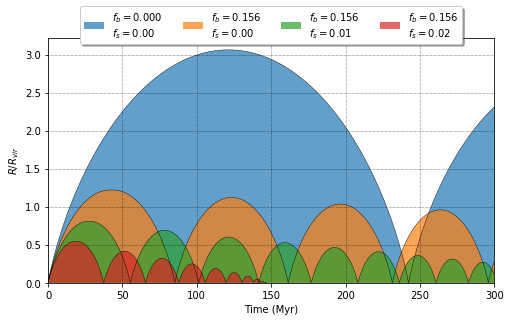

In [11]:
t_max = 0
fig, ax = plt.subplots(figsize = (8, 4.5))
for (i, result) in enumerate(results):
    t = 1000 * result.times
    if t[-1] > t_max: t_max = t[-1]
    ratio = ratios[i]
    fb = baryonics[i]
    y = result.distance / r_vir
    label = '$f_b = %.3f$\n$f_s = %.2f$' % (fb, ratio)
    ax.plot(t, y, c = 'k', lw = 0.4)
    ax.fill_between(t, 0, y, alpha = 0.7, label = label)
    
ax.set_xlabel('Time (Myr)')
ax.set_ylabel(r'$R / R_{vir}$')

ax.set_xlim(0, t_max)
ax.set_ylim(0, ax.get_ylim()[1])

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15),
          ncol = 4, fancybox = True, shadow = True)

ax.grid()

fig.savefig('stellar_density_comparison.png', dpi = 300)

plt.show()

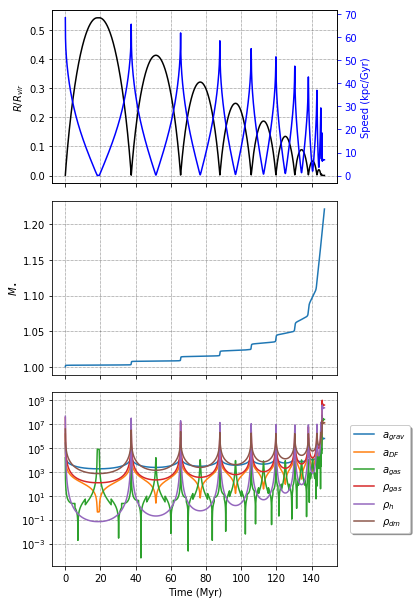

In [10]:
fig, (ax1, ax2, ax3) = smbh.plotProperties(results[-1], r_vir)

fig.savefig('properties_s0.02v70.png', dpi = 300)

plt.show()